# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [96]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [97]:
### Replace each question mark with the appropriate value.
import numpy as np
# Number of training examples
n_train = y_train.shape[0]

# Number of testing examples.
n_test = y_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### Data exploration visualization goes here.
# Visualizations will be shown in the notebook.

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

13


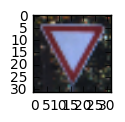

In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

In [23]:
import pandas

sign_name = pandas.read_csv("signnames.csv")
print(sign_name)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

## Check image number with signame file number
Correct, the plotted image number 13 shows a "Yield" traffic sign classification in signames.csv, the classification and the picture we visualised are the same, so this looks very good.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Preprocess the data here.

In [111]:
np.random.seed(99)

In [112]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I used numpy random_seed() and shuffle from sklearn to shuffle my training data, this both to shuffle the data to be sure the training will be on randonmized data sets.

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I used train_test_split from sklearn to slice of some of my traning data to create a validation set, this beceause the original data was divided in training and testing data and missing a validation set, so I created it. 

In [114]:
import tensorflow as tf

EPOCHS = 24
BATCH_SIZE = 128

In [115]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [116]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [117]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** My final achitecture is a LeNet CNN (Convential Neural Network) with 5 layers, EPOCH10, a 128 Batch size and 43 output classes.

In [118]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
predictions_prob = tf.nn.softmax(logits)
prediction = tf.argmax(logits, 1)
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [121]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.659

EPOCH 2 ...
Validation Accuracy = 0.832

EPOCH 3 ...
Validation Accuracy = 0.873

EPOCH 4 ...
Validation Accuracy = 0.919

EPOCH 5 ...
Validation Accuracy = 0.933

EPOCH 6 ...
Validation Accuracy = 0.936

EPOCH 7 ...
Validation Accuracy = 0.933

EPOCH 8 ...
Validation Accuracy = 0.939

EPOCH 9 ...
Validation Accuracy = 0.953

EPOCH 10 ...
Validation Accuracy = 0.958

EPOCH 11 ...
Validation Accuracy = 0.940

EPOCH 12 ...
Validation Accuracy = 0.957

EPOCH 13 ...
Validation Accuracy = 0.958

EPOCH 14 ...
Validation Accuracy = 0.959

EPOCH 15 ...
Validation Accuracy = 0.951

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.955

EPOCH 18 ...
Validation Accuracy = 0.949

EPOCH 19 ...
Validation Accuracy = 0.967

EPOCH 20 ...
Validation Accuracy = 0.956

EPOCH 21 ...
Validation Accuracy = 0.963

EPOCH 22 ...
Validation Accuracy = 0.928

EPOCH 23 ...
Validation Accuracy = 0.962

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 
### First run with default parameters:
Validation score: 96%
Training score: 99%
Test score: 89%

The fact that the training score is the highest is because the model is trained on it and this results in the best prediction, the Validation score of 95% looks good, only the test score of 87% is a bit low I think, so let's try some adjustments to get it higher!

### Tweaking the LeNet model parameters:
The first run the Validation Accuracy showed 94,5 %, so quite good I think, I still wanted to train for a even higher Validation Accuracy. To train my LeNet model I tweaked the number of EPOCH's, from 10 to 15, this did not result in a higher Validation Accuracy, EPOCH 15 was 0.925 for example. There after I resetted the EPOCH back to 10 and I up leveled the batchc size from 128 to 256 and this resulted in a Validation Score of 0.848, then I decided to move dowm this value to size to 64, this resulted in a Validation Accuracy of 0.90. Thereafter I resetted the parameters to their original values. I also tweaked the rate parameter from 0.001 to 0.005, this resulted in a very poor Validation Accuracy of 0.054.

### Tweaking the test set percentage:
I also changed the test set percentage from 20% to 35%, this resulted in a lower (94%) Validation score than before changing it. (95%)The train score (97%) and test score (86%) showed the same score so I reseted the test data percentage back to 20%.

### Add random_state() to the notebook
My last try to uplevel the Test score is to add random_state() to the notebook, this was advised to me and maybe it helps, let's try it! Adding the random_state() function to the notebook resulted in 4 percent extra Test score, from 85% to 89%!


### Number of EPOCH's
I used 24 EPOCH's, this because the Validation score was the highest at this point, 0.958 it was. At EPOCH 25 it was lower at 0.950, this to make sure that the model is not biased to the testing set. I tried testing with 25 EPOCH's.

### Let's run our model on the train data (X_train and y_train) to see if our model performs good on the Training set

In [122]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    Train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(Train_accuracy))

Train Accuracy = 0.989


### Now we are ready to run the model on our Test data (X_test and y_test) to see the score of the prediction

In [123]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.885


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** After multiple runs with different parameters my Validation Accuracy with the default parameters resulted in 94,5%, I decided to use this Model to run the LeNet model on my Test data, the Test Accuracy resulted in 0.883, the hard thing is that 
Also see question 4 about all the parameters I have tweaked to up level the scores of the test score.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import numpy as np
import cv2

In [125]:
cd C:\Users\marti\Google Drive\Udacity\Self Driving Car\CarND-Traffic-Sign-Classifier-Project-master-new\Traffic_Signs_Score_Test

C:\Users\marti\Google Drive\Udacity\Self Driving Car\CarND-Traffic-Sign-Classifier-Project-master-new\Traffic_Signs_Score_Test


### Let's plot the first  five out of the ten own images I just found:

This image is: <class 'numpy.ndarray'> with dimesions: (207, 210, 3)


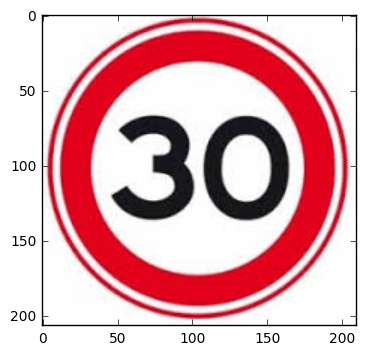

In [126]:
#reading in an image
image = mpimg.imread('test_images/image_1.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

This image is: <class 'numpy.ndarray'> with dimesions: (213, 160, 3)


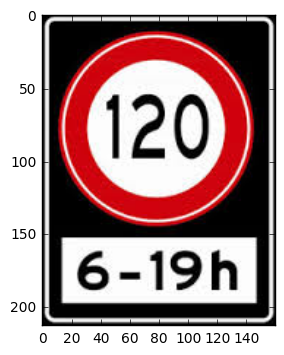

In [127]:
#reading in an image
image = mpimg.imread('test_images/image_2.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

This image is: <class 'numpy.ndarray'> with dimesions: (225, 225, 3)


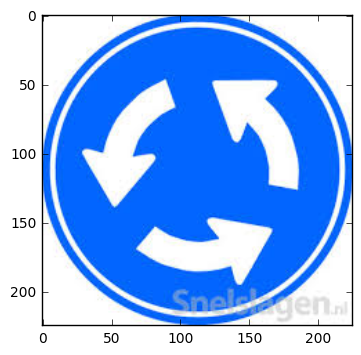

In [128]:
#reading in an image
image = mpimg.imread('test_images/image_3.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

This image is: <class 'numpy.ndarray'> with dimesions: (225, 225, 3)


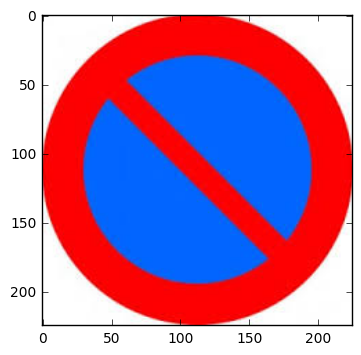

In [129]:
#reading in an image
image = mpimg.imread('test_images/image_4.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

This image is: <class 'numpy.ndarray'> with dimesions: (224, 225, 3)


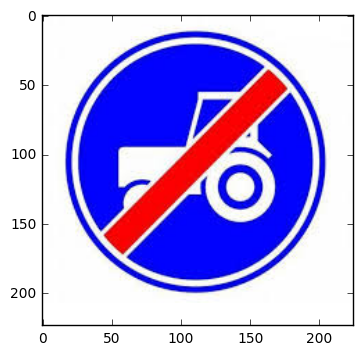

In [130]:
#reading in an image
image = mpimg.imread('test_images/image_5.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

### We read in the signames file again

In [131]:
import csv
dict_signs={}
signs_file = './signnames.csv'
with open(signs_file) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dict_signs[row['ClassId']] = row['SignName']

### Now let's put all the images in an array to loop over them with our LeNet model

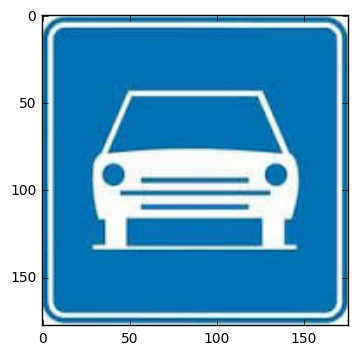

In [132]:
import os

for filename in os.listdir("test_images/"):
   img = mpimg.imread(os.path.join("test_images/",filename))
   plt.imshow(img)

In [133]:
import os
import cv2
import numpy as np

own_pictures = []

dirname = './test_images'

for fn in os.listdir(dirname):
    try:
        img = cv2.imread(os.path.join(dirname, fn))
        img = cv2.resize(img, (32, 32))
        own_pictures.append(np.array(img))
    except Exception as e:
        pass
    
own_pictures = np.asarray(own_pictures)

### Now we match our pictures to the classes of the sign_names file

In [134]:
y_data = [1, 8, 40, 44, 45, 31, 4, 25, 46, 42]
y_data = np.asarray(y_data)

In [135]:
with tf.Session() as sess:
   saver.restore(sess, tf.train.latest_checkpoint('.'))

   own_accuracy = evaluate(own_pictures, y_data)
   print("Own Accuracy = {:.3f}".format(own_accuracy))

Own Accuracy = 0.100


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**'I have selected 10 jpg pictures of Dutch traffic signs found on Google, I decided to use .jpg picturea because the PNG files were hard to reshape to our needed 32x32 format for LeNet CNN classification using our model.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The 10 traffic signs I found are from The Netherlands, and almost the same as the German Signs I think. When running the model my first score was 0.000, after training my model with more EPOCH's I up leveled this to 0.100!!

Any particular qualities of the images or traffic signs in the images that are of interest, making it more difficult for the model to classify are:

Not all captured pictures are in the 43 classes of the German Traffic signs classes, so the model is not able to classify them, thus there is no class for the LeNet model to assign them to.

The Contrast of the images is great, I used the best findable pictures that came out my Google search for pictures of Dutch traffic signs, also the Angle of the traffic signs was not a problem, thus the images were all the same lay-out. (A drawing of the sign) But thinking of this I come to the statement that the model might have suffered a hard time when comparing some of my my own pictures (a drawing of a traffic sign) to the real pictures of the same class the original model was trained on.

This leads to the conclusion that the lower score for my own images could be caused by things among the things I have listed in the question 8 section.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [137]:
print(predictions_prob)

[[  1.67549419e-10   1.00000000e+00   4.04101261e-16   1.38005124e-30
    4.12624920e-17   7.79324448e-22   0.00000000e+00   3.66979407e-17
    0.00000000e+00   0.00000000e+00   8.80438140e-18   2.27263824e-31
    0.00000000e+00   0.00000000e+00   1.18018868e-26   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   2.55532984e-33   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   1.33998335e-35   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   4.12757231e-13   0.00000000e+00   0.00000000e+00
    3.19090076e-26   8.88095239e-33   0.00000000e+00   0.00000000e+00
    8.62961272e-25   0.00000000e+00   4.78826166e-27]
 [  0.00000000e+00   3.99191109e-35   2.74001415e-32   5.46559048e-11
    0.00000000e+00   7.02970870e-29   0.00000000e+00   1.09543497e-22
    0.00000000e+00   5.68551684e-07   0.00000000e+00   1.11553594e-02
    8.04826199e-37   2.19492111e-32 

In [152]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    top_5 = sess.run(tf.nn.top_k(tf.constant(predictions_prob), k=5))

In [153]:
print(top_5)

TopKV2(values=array([[  1.00000000e+00,   1.67549419e-10,   4.12757231e-13,
          4.04101261e-16,   4.12624920e-17],
       [  9.88756001e-01,   1.11553594e-02,   8.80668158e-05,
          5.68551684e-07,   2.35453896e-08],
       [  9.99998808e-01,   1.22222116e-06,   2.99310727e-08,
          6.40929801e-13,   5.27691335e-13],
       [  1.00000000e+00,   3.46447483e-23,   1.23308253e-25,
          4.33594685e-26,   3.10767563e-26],
       [  1.00000000e+00,   6.33465279e-15,   3.21566000e-17,
          1.05010630e-18,   2.17320923e-19],
       [  9.99993086e-01,   6.97243604e-06,   6.83366141e-11,
          9.14533380e-12,   1.30844779e-15],
       [  9.99998212e-01,   1.74871070e-06,   1.51369912e-23,
          2.78358199e-27,   1.86798076e-28],
       [  9.99940515e-01,   5.95125821e-05,   2.09678890e-16,
          2.27146195e-17,   1.65810649e-18],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.93128538e-0

In [62]:
import pandas

sign_name = pandas.read_csv("signnames.csv")
print(sign_name)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

**Answer:** The top 5 (k=5) classes are: 
TopKV2(values=array([[  1.00000000e+00,   1.67549419e-10,   4.12757231e-13, 4.04101261e-16,   4.12624920e-17], so we can 
confirm these are the 5 largest probabilities. we also see this corresponding indices to the above classes:

indices=array([[ 1,  0, 33,  2,  4]

0 = Speed limit (20km/h)
1 = Speed limit (30km/h)
2 = Speed limit (50km/h)
4 = Speed limit (70km/h)
33 = Turn right ahead

This is a great way to check and see how our model performed and to define the top 5 classes!
Let's compare the prediction accuracy of the result of the captured images with the testing set:

From the prediction I did to the candidate image, the testing accuracy is 10%, however, the model prediction accuracy on the training set was 96%. As a result, I believe my model did not perform well in the real world situation. The possible reasons could be: the training set score is normally always the highest, thus the trained model is based on this data and found the best way to classify them, some of my own images were not availadble in the original class, we compared real images versus drawings of images and also the difference between training on German traffic signs and running this on my pictures of Dutch traffic signs.